# Scikit-Learn:

A library containing many **Machine Learning** algorithms. Considering scikit-learn comes with multiple tools like **Train/Test Split**, **Cross Validation** and **Reporting Metric Functions**; it is a one-stop shop for majority of the **Machine Learning** needs.

In [2]:
# importing required libraries

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('datasets/advertising.csv')

In [4]:
df['total_spend'] = df['TV'] + df['Radio'] + df['Newspaper'] 

In [5]:
X = df[['total_spend']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [7]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 7.779806406885763


In [8]:
cols_to_use = ['TV', 'Radio', 'Newspaper', 'total_spend', 'Sales']

df = df[cols_to_use] 

In [9]:
X = df.drop(columns=['Sales'])
y = df['Sales'] 

In [10]:
df.head()

,TV,Radio,Newspaper,total_spend,Sales
0,230.1,37.8,69.2,337.1,22.1
1,44.5,39.3,45.1,128.9,10.4
2,17.2,45.9,69.3,132.4,9.3
3,151.5,41.3,58.5,251.3,18.5
4,180.8,10.8,58.4,250.0,12.9


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TV           200 non-null    float64
 1   Radio        200 non-null    float64
 2   Newspaper    200 non-null    float64
 3   total_spend  200 non-null    float64
 4   Sales        200 non-null    float64
dtypes: float64(5)
memory usage: 7.9 KB


In [12]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [13]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
# Note: X_train and y_train need to be defined first (in the cell above)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

In [24]:
X = df[['total_spend']]  # Use double brackets to keep it as 2D DataFrame
y = df['Sales'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Train model with Newspaper feature
from sklearn.linear_model import LinearRegression 
model_newspaper = LinearRegression()
model_newspaper.fit(X_train, y_train)
y_pred_newspaper = model_newspaper.predict(X_test)

In [26]:
# Calculate MSE for Newspaper model
from sklearn.metrics import mean_squared_error
mse_newspaper = mean_squared_error(y_test, y_pred_newspaper)
print(f"Mean Squared Error (Newspaper): {mse_newspaper}")

Mean Squared Error (Newspaper): 7.779806406885763


## Evaluation Metrics for Regression:

- **Mean Absolute Error** - This is the mean of the absolute value of errors i.e. the absolute value difference between **predicted value** and **actual value**
- **Mean Squared Error** - This is the squared value of the **MAE**
- **Root Mean Square Error** - This is the square root of **MSE** 

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

In [28]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Square Error: {rmse}")

Mean Absolute Error: 2.088427355846614
Mean Squared Error: 7.779806406885763
Root Mean Square Error: 2.789230432733331


In [29]:
test_residuals = y_test - y_pred 

In [30]:
test_residuals

95     0.598920
15     3.739188
30    -0.609478
158   -1.461688
128    7.189679
115    0.460273
69     4.035740
170    0.313920
174   -4.365362
45    -0.485583
66     2.476289
182    0.046018
165   -8.067967
78    -1.057894
186   -2.104096
177   -2.907165
56    -2.429417
152    0.920675
82     0.859084
68     1.223225
124   -0.919096
16    -2.361742
148    2.314558
93     0.420620
65     1.253086
60     0.165687
84     3.318243
67     1.201524
125    0.315747
132   -0.315195
9     -4.516319
18     1.843122
55     4.437015
75    -2.813076
150   -4.303685
104    2.930207
135    2.348741
137   -1.106668
164    1.008679
76     0.292425
Name: Sales, dtype: float64

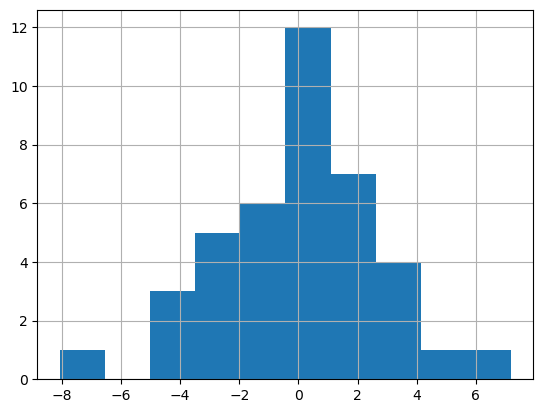

In [31]:
test_residuals.hist()
plt.show() 

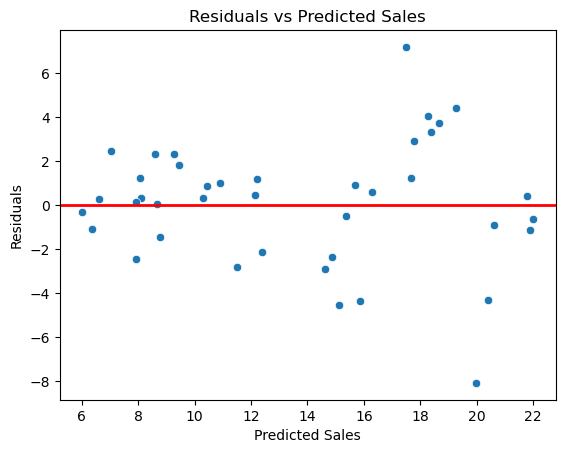

In [32]:
sns.scatterplot(x=y_pred, y=test_residuals)
plt.axhline(y=0, color='red', linewidth=2)
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Sales')
plt.show() 

/var/folders/6j/8xgqrdp53xgf3d5x8dr49sjm0000gn/T/ipykernel_64227/2306392582.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_residuals, bins = 25, kde = True)


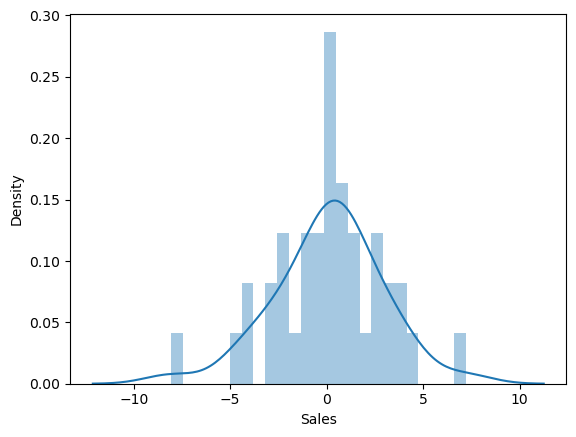

In [34]:
sns.distplot(test_residuals, bins = 25, kde = True)
plt.show() 

In [35]:
import scipy as sp 

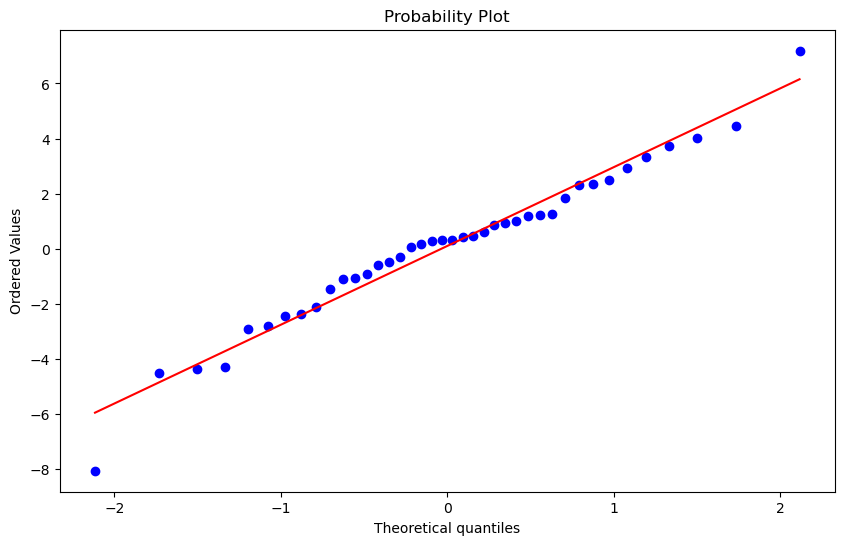

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))
sp.stats.probplot(test_residuals, plot=ax)
plt.show() 